# Case Study 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/archive/casestudy.csv")

In [3]:
data.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
# Answering question

# 1: Total revenue for the current year

In [5]:

yearly_sales = data.groupby(['year'])['net_revenue'].sum() #sum function
print(yearly_sales)

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64


In [6]:
year_sales=yearly_sales.to_frame() # Since it is a Series conmverting to Dataframe to plot further

In [7]:
year_sales

,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


In [8]:
year_sales.reset_index(inplace=True)

In [9]:
year_sales

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


<AxesSubplot:xlabel='year', ylabel='net_revenue'>

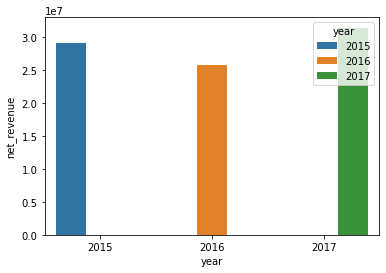

In [10]:
sns.barplot(x='year',y='net_revenue',hue='year',data=year_sales)

# Observations: 
<b><br> 2017 year has highest Net Revenue 31 M while 2016 has lowest Net Revenue of 25 M </br></b>

In [11]:
# Question2: New Customer Revenue 
# Finding Net Revenue of new customers only which are not present in previous years

In [12]:
g1=data.groupby(['year','customer_email'])['net_revenue'].sum()

In [13]:
g1

year  customer_email       
2015   aaagldjgdt@gmail.com     44.72
       aaaicvtnzx@gmail.com     49.20
       aaaihliwuo@gmail.com    248.67
       aaaqpobaaa@gmail.com    126.83
       aaatyrafec@gmail.com     65.28
                                ...  
2017  zzzdnukepj@gmail.com      81.99
      zzzeehgitl@gmail.com      65.98
      zzzmkaruhf@gmail.com     202.77
      zzznqseiwv@gmail.com     162.24
      zzzoxtrfic@gmail.com      15.74
Name: net_revenue, Length: 685927, dtype: float64

In [14]:
g1.to_csv("C:/Users/shwer/OneDrive/Desktop/archive/yearly_revenue_cust.csv")

In [15]:
df=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/archive/yearly_revenue_cust.csv")

In [16]:
df

,year,customer_email,net_revenue
0,2015,aaagldjgdt@gmail.com,44.72
1,2015,aaaicvtnzx@gmail.com,49.20
2,2015,aaaihliwuo@gmail.com,248.67
3,2015,aaaqpobaaa@gmail.com,126.83
4,2015,aaatyrafec@gmail.com,65.28
...,...,...,...
685922,2017,zzzdnukepj@gmail.com,81.99
685923,2017,zzzeehgitl@gmail.com,65.98
685924,2017,zzzmkaruhf@gmail.com,202.77
685925,2017,zzznqseiwv@gmail.com,162.24


In [17]:
# Reference: https://stackoverflow.com/questions/53672456/finding-new-existing-customers-from-a-dataframe
# Findind duplicates
a=df.assign(Occurence=np.where(~df['customer_email'].duplicated(),'New','Existing'))

In [18]:
a

,year,customer_email,net_revenue,Occurence
0,2015,aaagldjgdt@gmail.com,44.72,New
1,2015,aaaicvtnzx@gmail.com,49.20,New
2,2015,aaaihliwuo@gmail.com,248.67,New
3,2015,aaaqpobaaa@gmail.com,126.83,New
4,2015,aaatyrafec@gmail.com,65.28,New
...,...,...,...,...
685922,2017,zzzdnukepj@gmail.com,81.99,New
685923,2017,zzzeehgitl@gmail.com,65.98,New
685924,2017,zzzmkaruhf@gmail.com,202.77,New
685925,2017,zzznqseiwv@gmail.com,162.24,New


In [19]:
a[(a['customer_email']=='aaaqpobaaa@gmail.com')]

,year,customer_email,net_revenue,Occurence


In [20]:
x=a[a['Occurence']=='Existing']

In [21]:
x

,year,customer_email,net_revenue,Occurence
231296,2016,aaaqpobaaa@gmail.com,109.50,Existing
231298,2016,aaatyrafec@gmail.com,45.53,Existing
231304,2016,aacamnskvy@gmail.com,12.80,Existing
231306,2016,aacogwrfad@gmail.com,103.67,Existing
231307,2016,aacrpgjcil@gmail.com,202.36,Existing
...,...,...,...,...
685866,2017,zzurtiklzf@gmail.com,199.13,Existing
685870,2017,zzvasxeybi@gmail.com,237.84,Existing
685872,2017,zzvgdegvtp@gmail.com,107.59,Existing
685883,2017,zzwelbhzzy@gmail.com,161.99,Existing


In [22]:
x1=a[a['Occurence']=='New']

In [23]:

new_customers = x1.groupby(['year'])['net_revenue'].sum() #sum function
print(new_customers)

year
2015    29036749.19
2016    18245491.01
2017    28676607.64
Name: net_revenue, dtype: float64


In [24]:
new_cust=new_customers.to_frame() # Since it is a Series conmverting to Dataframe to plot further

In [25]:
new_cust.reset_index(inplace=True)

In [26]:
new_cust

,year,net_revenue
0,2015,29036749.19
1,2016,18245491.01
2,2017,28676607.64


<AxesSubplot:xlabel='year', ylabel='net_revenue'>

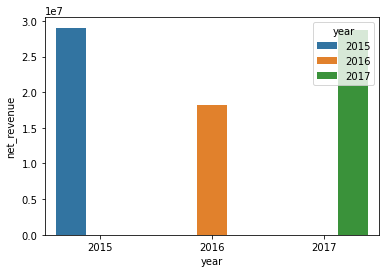

In [27]:
sns.barplot(x='year',y='net_revenue',hue='year',data=new_cust)

# Observations:
<br>New Customer Revenue for 2016: 18.24 M </br>
<br>New Customer Revenue for 2017: 28.67 M </br>

# Question: Total Customers Per Year

In [28]:
data=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/archive/casestudy.csv")
d_2015=data[data['year']==2015]
d_2016=data[data['year']==2016]
d_2017=data[data['year']==2017]

In [29]:
print(len(d_2015['customer_email'].unique()))
print(len(d_2016['customer_email'].unique()))
print(len(d_2017['customer_email'].unique()))

231294
204646
249987


<AxesSubplot:>

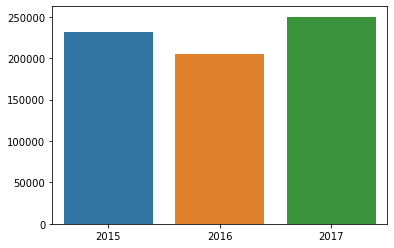

In [30]:
x=[231294,204646,249987]
y=[2015,2016,2017]
sns.barplot(x=y,y=x)

# Observations:
<br> Total Unique Customers in 2015 are 231294 </br>
<br> Total Unique Customers in 2016 are 204646 </br>
<br> Total Unique Customers in 2017 are 249987 </br>

# Question : Count of New Customers per year

In [31]:
# Question : Count of New Customers per year
x1=a[a['Occurence']=='New']
new_2015=x1[x1['year']==2015]
new_2016=x1[x1['year']==2016]
new_2017=x1[x1['year']==2017]

In [32]:
print(len(new_2015['customer_email'].unique()))
print(len(new_2016['customer_email'].unique()))
print(len(new_2017['customer_email'].unique()))

231294
145062
228262


<AxesSubplot:>

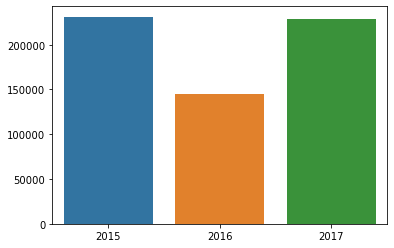

In [33]:
x=[231294,145062,228262]
y=[2015,2016,2017]
sns.barplot(x=y,y=x)

# Observations: 
<br> Total Unique New Customers in 2015 are 231294 </br>
<br> Total Unique New Customers in 2016 are 145062 </br>
<br> Total Unique New Customers in 2017 are 228262 </br>

# Question: Lost Customers


In [34]:
a

,year,customer_email,net_revenue,Occurence
0,2015,aaagldjgdt@gmail.com,44.72,New
1,2015,aaaicvtnzx@gmail.com,49.20,New
2,2015,aaaihliwuo@gmail.com,248.67,New
3,2015,aaaqpobaaa@gmail.com,126.83,New
4,2015,aaatyrafec@gmail.com,65.28,New
...,...,...,...,...
685922,2017,zzzdnukepj@gmail.com,81.99,New
685923,2017,zzzeehgitl@gmail.com,65.98,New
685924,2017,zzzmkaruhf@gmail.com,202.77,New
685925,2017,zzznqseiwv@gmail.com,162.24,New


In [35]:
df=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/archive/yearly_revenue_cust.csv")
l_2015=df[df['year']==2015]
l_2016=df[df['year']==2016]
l_2017=df[df['year']==2017]

In [36]:
l_2015[~l_2015['customer_email'].isin(l_2016['customer_email'])]

,year,customer_email,net_revenue
0,2015,aaagldjgdt@gmail.com,44.72
1,2015,aaaicvtnzx@gmail.com,49.20
2,2015,aaaihliwuo@gmail.com,248.67
5,2015,aabeiqckqu@gmail.com,44.47
6,2015,aabipmtctn@gmail.com,4.69
...,...,...,...
231289,2015,zzzcdrueqb@gmail.com,55.99
231290,2015,zzzjhxjwic@gmail.com,72.11
231291,2015,zzzrjsowtl@gmail.com,95.80
231292,2015,zzztwcvgvp@gmail.com,129.75


In [37]:
# Observations: As 2015 total Customers are 231294
# Lost Customers i.e. Customers which are present in 2015 but absent in 2016 = 59584

In [38]:
l_2016[~l_2016['customer_email'].isin(l_2017['customer_email'])]

,year,customer_email,net_revenue
231294,2016,aaafxtkgxo@gmail.com,127.62
231295,2016,aaaglfuvti@gmail.com,160.79
231296,2016,aaaqpobaaa@gmail.com,109.50
231297,2016,aaatizazdz@gmail.com,51.17
231298,2016,aaatyrafec@gmail.com,45.53
...,...,...,...
435935,2016,zzxqawadmp@gmail.com,48.06
435936,2016,zzylxsttdq@gmail.com,75.16
435937,2016,zzysesrqck@gmail.com,195.33
435938,2016,zzyyqigvjs@gmail.com,25.37


In [39]:
# Observations: As 2016 total Customers are 204646
# Lost Customers i.e. Customers which are present in 2016 but absent in 2017 = 183687

# Observations:
<b><br> Lost Customers i.e. Customers which are present in 2015 but absent in 2016 = 59584 </br></b>
<b><br> Lost Customers i.e. Customers which are present in 2016 but absent in 2017 = 183687 </br></b>

# Question: Existing Customer Growth

In [40]:
df=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/archive/yearly_revenue_cust.csv")
df_2015=df[df['year']==2015]
df_2016=df[df['year']==2016]
df_2017=df[df['year']==2017]

In [41]:
df_2015

,year,customer_email,net_revenue
0,2015,aaagldjgdt@gmail.com,44.72
1,2015,aaaicvtnzx@gmail.com,49.20
2,2015,aaaihliwuo@gmail.com,248.67
3,2015,aaaqpobaaa@gmail.com,126.83
4,2015,aaatyrafec@gmail.com,65.28
...,...,...,...
231289,2015,zzzcdrueqb@gmail.com,55.99
231290,2015,zzzjhxjwic@gmail.com,72.11
231291,2015,zzzrjsowtl@gmail.com,95.80
231292,2015,zzztwcvgvp@gmail.com,129.75


In [42]:
z=df_2015.merge(df_2016, left_on='customer_email', right_on='customer_email')

In [43]:
z

,year_x,customer_email,net_revenue_x,year_y,net_revenue_y
0,2015,aaaqpobaaa@gmail.com,126.83,2016,109.50
1,2015,aaatyrafec@gmail.com,65.28,2016,45.53
2,2015,aacamnskvy@gmail.com,231.08,2016,12.80
3,2015,aacogwrfad@gmail.com,50.73,2016,103.67
4,2015,aacrpgjcil@gmail.com,145.07,2016,202.36
...,...,...,...,...,...
59579,2015,zzvuggtccl@gmail.com,136.63,2016,81.75
59580,2015,zzvylebylv@gmail.com,91.90,2016,225.77
59581,2015,zzvyvshcka@gmail.com,108.05,2016,197.20
59582,2015,zzxbdgtcoh@gmail.com,190.96,2016,21.32


In [44]:
z['Existing_Customer_growth']=z['net_revenue_y']-z['net_revenue_x']

In [45]:
z

,year_x,customer_email,net_revenue_x,year_y,net_revenue_y,Existing_Customer_growth
0,2015,aaaqpobaaa@gmail.com,126.83,2016,109.50,-17.33
1,2015,aaatyrafec@gmail.com,65.28,2016,45.53,-19.75
2,2015,aacamnskvy@gmail.com,231.08,2016,12.80,-218.28
3,2015,aacogwrfad@gmail.com,50.73,2016,103.67,52.94
4,2015,aacrpgjcil@gmail.com,145.07,2016,202.36,57.29
...,...,...,...,...,...,...
59579,2015,zzvuggtccl@gmail.com,136.63,2016,81.75,-54.88
59580,2015,zzvylebylv@gmail.com,91.90,2016,225.77,133.87
59581,2015,zzvyvshcka@gmail.com,108.05,2016,197.20,89.15
59582,2015,zzxbdgtcoh@gmail.com,190.96,2016,21.32,-169.64


In [74]:
z['Existing_Customer_growth'].sum()

20335.460000000006

In [75]:
# Merge z with 2017 year data
z1=df_2016.merge(df_2017, left_on='customer_email', right_on='customer_email')

In [76]:
z1

,year_x,customer_email,net_revenue_x,year_y,net_revenue_y
0,2016,aabmjtmoae@gmail.com,124.29,2017,64.32
1,2016,aabokiywci@gmail.com,9.95,2017,119.83
2,2016,aabuefrfjq@gmail.com,131.22,2017,84.30
3,2016,aacpbgkntc@gmail.com,136.06,2017,8.28
4,2016,aadbgmnypp@gmail.com,86.82,2017,115.23
...,...,...,...,...,...
20954,2016,zzurtiklzf@gmail.com,176.10,2017,199.13
20955,2016,zzvasxeybi@gmail.com,11.88,2017,237.84
20956,2016,zzvgdegvtp@gmail.com,79.93,2017,107.59
20957,2016,zzwelbhzzy@gmail.com,138.74,2017,161.99


In [77]:
z1['Existing_Customer_growth_2016-2017']=z1['net_revenue_y']-z1['net_revenue_x']

In [78]:
z1

,year_x,customer_email,net_revenue_x,year_y,net_revenue_y,Existing_Customer_growth_2016-2017
0,2016,aabmjtmoae@gmail.com,124.29,2017,64.32,-59.97
1,2016,aabokiywci@gmail.com,9.95,2017,119.83,109.88
2,2016,aabuefrfjq@gmail.com,131.22,2017,84.30,-46.92
3,2016,aacpbgkntc@gmail.com,136.06,2017,8.28,-127.78
4,2016,aadbgmnypp@gmail.com,86.82,2017,115.23,28.41
...,...,...,...,...,...,...
20954,2016,zzurtiklzf@gmail.com,176.10,2017,199.13,23.03
20955,2016,zzvasxeybi@gmail.com,11.88,2017,237.84,225.96
20956,2016,zzvgdegvtp@gmail.com,79.93,2017,107.59,27.66
20957,2016,zzwelbhzzy@gmail.com,138.74,2017,161.99,23.25


In [80]:
z1['Existing_Customer_growth_2016-2017'].sum()

20611.34

# Observations:
<b><br> Existing Customer Growth where Revenue 2016 - Revenue 2015 for customers present in both years is 20335.4 in Total</br></b>
<b><br> Existing Customer Growth where Revenue 2017 - Revenue 2016 for customers present in both years is 20611.34 in Total </br></b>

# Existing Customer Current Revenue
##### Getting Total revenue in 2015 for customers which are also present in 2016

In [81]:
z['net_revenue_x'].sum()

7465117.12

In [82]:
z['net_revenue_y'].sum()

7485452.58

# Observations:
<br> Total Revenue in 2015 for customers which are present in 2015 and 2016 both is 7.46 M </br>
<br> Total Revenue in 2016 for customers which are present in 2015 and 2016 both is 7.48 M </br>

##### Getting Total revenue in 2016 for customers which are also present in 2017

In [83]:
z1['net_revenue_x'].sum()

2620648.65

In [84]:
z1['net_revenue_y'].sum()

2641259.99

# Observations:
<br> Total Revenue in 2016 for customers which are present in 2017 and 2016 both is 2.62 M </br>
<br> Total Revenue in 2017 for customers which are present in 2017 and 2016 both is 2.64 M </br>

# Summary
<br> Total Revenue in 2015 for customers which are present in 2015 and 2016 both is 7.46 M </br>
<br> Total Revenue in 2016 for customers which are present in 2015 and 2016 both is 7.48 M </br>
<br> Total Revenue in 2016 for customers which are present in 2017 and 2016 both is 2.62 M </br>
<br> Total Revenue in 2017 for customers which are present in 2017 and 2016 both is 2.64 M </br>

# Question: Revenue Lost from attrition
## I am finding Revenue lost each year </b>

In [50]:
year_sales

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


In [51]:
year_sales['Difference']=0

In [52]:
year_sales

,year,net_revenue,Difference
0,2015,29036749.19,0
1,2016,25730943.59,0
2,2017,31417495.03,0


In [53]:
for index,row in year_sales.iterrows():
        if index == 0:
            continue
        elif row['year'] == 2016:
            year_sales['Difference'][index] =year_sales['net_revenue'][index]-year_sales['net_revenue'][index-1]
        else:
            year_sales['Difference'][index] = year_sales['net_revenue'][index]-year_sales['net_revenue'][index-1]

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [54]:
year_sales

,year,net_revenue,Difference
0,2015,29036749.19,0
1,2016,25730943.59,-3305805
2,2017,31417495.03,5686551


# Observations:
<br><b> So Year 2016 made a loss of 3305805 of Net Revenue from year 2015</b> </br>
<br><b> Year 2017 made a profit of 5686551 of Net Revenue from year 2016 </b></br>

# Now Answering the same question where Finding Total Revenue lost in the year 2016(Customers which are absent in year 2016 but present in 2015) and similarly for 2017

In [55]:
df=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/archive/yearly_revenue_cust.csv")
l_2015=df[df['year']==2015]
l_2016=df[df['year']==2016]
l_2017=df[df['year']==2017]

In [56]:
q=l_2015[~l_2015['customer_email'].isin(l_2016['customer_email'])]

In [57]:
q['net_revenue'].sum()

21571632.069999997

In [58]:
q1=l_2016[~l_2016['customer_email'].isin(l_2017['customer_email'])]

In [59]:
q1['net_revenue'].sum()

23110294.94

# Observations: 
<b><br>Revenue lost from customers which are present in 2015 but not in 2016 is 21 M </br></b>
<b><br>Revenue lost from customers which are present in 2016 but not in 2017 is 23 M </br></b>

# Finding customers which are present in all 3 years and contribute most to Net Revenue

In [60]:
z1

,year_x,customer_email,net_revenue_x,year_y,net_revenue_y,Existing_Customer_growth,year,net_revenue,Existing_Customer_growth_2016-2017
0,2015,aabmjtmoae@gmail.com,59.73,2016,124.29,64.56,2017,64.32,-59.97
1,2015,aabokiywci@gmail.com,122.25,2016,9.95,-112.30,2017,119.83,109.88
2,2015,aabuefrfjq@gmail.com,195.34,2016,131.22,-64.12,2017,84.30,-46.92
3,2015,aacpbgkntc@gmail.com,196.85,2016,136.06,-60.79,2017,8.28,-127.78
4,2015,aadbgmnypp@gmail.com,150.21,2016,86.82,-63.39,2017,115.23,28.41
...,...,...,...,...,...,...,...,...,...
6157,2015,zzmqwqrevt@gmail.com,7.02,2016,91.56,84.54,2017,14.63,-76.93
6158,2015,zzpgdjqokk@gmail.com,157.73,2016,175.38,17.65,2017,131.23,-44.15
6159,2015,zzshbuaipi@gmail.com,130.77,2016,105.68,-25.09,2017,45.12,-60.56
6160,2015,zzvasxeybi@gmail.com,157.56,2016,11.88,-145.68,2017,237.84,225.96


In [61]:
z1['Total_revenue']=z1['net_revenue_x']+ z1['net_revenue_y']+z1['net_revenue']

In [62]:
z1

,year_x,customer_email,net_revenue_x,year_y,net_revenue_y,Existing_Customer_growth,year,net_revenue,Existing_Customer_growth_2016-2017,Total_revenue
0,2015,aabmjtmoae@gmail.com,59.73,2016,124.29,64.56,2017,64.32,-59.97,248.34
1,2015,aabokiywci@gmail.com,122.25,2016,9.95,-112.30,2017,119.83,109.88,252.03
2,2015,aabuefrfjq@gmail.com,195.34,2016,131.22,-64.12,2017,84.30,-46.92,410.86
3,2015,aacpbgkntc@gmail.com,196.85,2016,136.06,-60.79,2017,8.28,-127.78,341.19
4,2015,aadbgmnypp@gmail.com,150.21,2016,86.82,-63.39,2017,115.23,28.41,352.26
...,...,...,...,...,...,...,...,...,...,...
6157,2015,zzmqwqrevt@gmail.com,7.02,2016,91.56,84.54,2017,14.63,-76.93,113.21
6158,2015,zzpgdjqokk@gmail.com,157.73,2016,175.38,17.65,2017,131.23,-44.15,464.34
6159,2015,zzshbuaipi@gmail.com,130.77,2016,105.68,-25.09,2017,45.12,-60.56,281.57
6160,2015,zzvasxeybi@gmail.com,157.56,2016,11.88,-145.68,2017,237.84,225.96,407.28


In [65]:
d=z1.sort_values(by='Total_revenue', ascending=False)

In [69]:
c=d.head(5)

[Text(0, 0, 'awldtrazam@gmail.com'),
 Text(1, 0, 'snpikuedpq@gmail.com'),
 Text(2, 0, 'nieubgwpeb@gmail.com'),
 Text(3, 0, 'cygnefefnq@gmail.com'),
 Text(4, 0, 'iwhmalcmaa@gmail.com')]

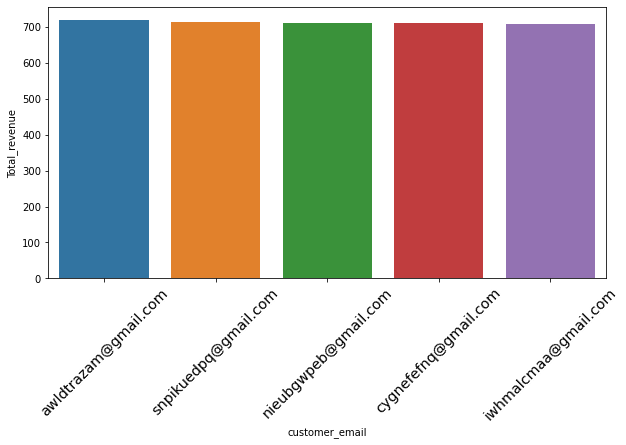

In [72]:
# Reference: https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html
plt.figure(figsize=(10,5))
chart = sns.barplot(x='customer_email',y='Total_revenue',data=c)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,fontsize='x-large')

# Observations:
<br> These 5 customers are there for 3 years and contribute most to the Net_Revenue </br> 